In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
max(df['pickup_longitude'])

57.418457

In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.shape

(200000, 9)

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.shape

(199999, 9)

In [12]:
df = df.drop(df[(df.pickup_latitude<-90) | (df.pickup_latitude>90)].index)
'''df.column_name comparison operator value'''

'df.column_name comparison operator value'

In [13]:
df.shape

(199995, 9)

In [14]:
df = df.drop(df[(df.dropoff_latitude<-90) | (df.dropoff_latitude>90)].index)

In [15]:
df = df.drop(df[(df.pickup_longitude<-180) | (df.pickup_longitude>180)].index)

In [16]:
df = df.drop(df[(df.dropoff_longitude<-180) | (df.dropoff_longitude>180)].index)

In [17]:
df.shape

(199987, 9)

In [18]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999870e+05,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000
mean,2.771284e+07,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544
std,1.601384e+07,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999
min,1.000000e+00,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000
25%,1.382554e+07,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000
50%,2.774626e+07,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000
75%,4.155554e+07,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000
max,5.542357e+07,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000


<AxesSubplot:>

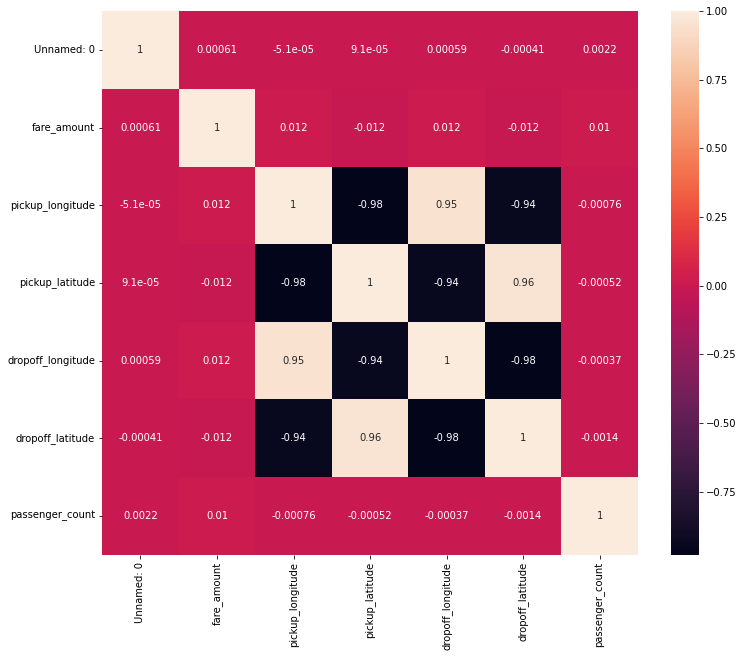

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [20]:
import numpy as np

In [21]:
plat = np.radians(df['pickup_latitude'])

In [22]:
plong = np.radians(df['pickup_longitude'])

In [23]:
dlat = np.radians(df['dropoff_latitude'])

In [24]:
dlong = np.radians(df['dropoff_longitude'])

In [25]:
lat = plat - dlat

In [26]:
long = plong - dlong

In [27]:
hava = np.sin(lat/2)**2 + np.cos(plat)*np.cos(dlat)*np.sin(long/2)**2
havr = np.sqrt(hava)
d = np.arcsin(havr) * 2 * 6367
d

0          1.682266
1          2.456047
2          5.033215
3          1.660640
4          4.472640
            ...    
199995     0.112140
199996     1.873873
199997    12.842251
199998     3.537493
199999     5.414382
Length: 199987, dtype: float64

In [28]:
distance = d

In [29]:
df['distance'] = d

In [30]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.682266
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.456047
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.033215
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.660640
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.472640
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112140
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.873873
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.842251
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.537493


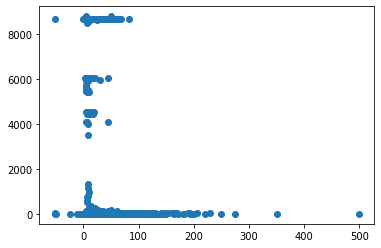

In [31]:
plt.scatter(df.fare_amount,df.distance)

In [32]:
import sklearn


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:

x = df['fare_amount'].values.reshape(-1, 1)
y = df['distance'].values.reshape(-1, 1)
#print(fare)

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [36]:
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [37]:
lr.score(x_test,y_test)

0.0013452532789390848

In [38]:
y_pred = lr.predict(x_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("mae = {} , mse = {} , rmse = {}".format(mae,mse,rmse))

mae = 34.443016956374635 , mse = 147064.61348432107 , rmse = 383.4900435269749
